In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split # amostra estratificada
from sklearn.naive_bayes import GaussianNB # Modelo de Naive_Bayes
from sklearn.preprocessing import LabelEncoder # Label encoding para transformar o dado categorico em número
from sklearn.metrics import confusion_matrix, accuracy_score # Importando a matrix de confussão e o teste de accuracia
from yellowbrick.classifier import ConfusionMatrix # Classe Matrix de Confussão

In [174]:
import pandas as pd

In [175]:
df = pd.read_csv("Credit.csv")
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [176]:
previsoes = df.iloc[:,0:20].values
classe = df.iloc[:,20].values

In [177]:
#Transformando os elementos categoricos em números, para isso iremos utilizar os indices

labelencoder1 = LabelEncoder()
previsoes[:,0] = labelencoder1.fit_transform(previsoes[:,0])

labelencoder2 = LabelEncoder()
previsoes[:,2] = labelencoder2.fit_transform(previsoes[:,2])


labelencoder3 = LabelEncoder()
previsoes[:,3] = labelencoder3.fit_transform(previsoes[:,3])


labelencoder4 = LabelEncoder()
previsoes[:,5] = labelencoder4.fit_transform(previsoes[:,5])


labelencoder5 = LabelEncoder()
previsoes[:,6] = labelencoder5.fit_transform(previsoes[:,6])


labelencoder6 = LabelEncoder()
previsoes[:,8] = labelencoder6.fit_transform(previsoes[:,8])


labelencoder7 = LabelEncoder()
previsoes[:,9] = labelencoder7.fit_transform(previsoes[:,9])



labelencoder8 = LabelEncoder()
previsoes[:,11] = labelencoder8.fit_transform(previsoes[:,11])


labelencoder9 = LabelEncoder()
previsoes[:,13] = labelencoder9.fit_transform(previsoes[:,13])


labelencoder10 = LabelEncoder()
previsoes[:,14] = labelencoder10.fit_transform(previsoes[:,14])


labelencoder11 = LabelEncoder()
previsoes[:,16] = labelencoder11.fit_transform(previsoes[:,16])


labelencoder12 = LabelEncoder()
previsoes[:,18] = labelencoder12.fit_transform(previsoes[:,18])


labelencoder13 = LabelEncoder()
previsoes[:,19] = labelencoder13.fit_transform(previsoes[:,19])


In [178]:
previsoes

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [179]:
X_train, X_teste, y_train, y_test = train_test_split(previsoes,classe, random_state=42, test_size=0.3)

X_teste

array([[2, 18, 3, ..., 1, 0, 1],
       [2, 18, 3, ..., 2, 1, 1],
       [2, 24, 0, ..., 1, 0, 1],
       ...,
       [0, 9, 3, ..., 1, 0, 1],
       [1, 36, 3, ..., 1, 1, 1],
       [2, 12, 3, ..., 1, 0, 1]], dtype=object)

In [180]:
# Criação e treinamento do modelo (Geração da tabela de probabilidade)
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [181]:
predict = naive_bayes_model.predict(X_teste)
predict

array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'good', 'bad', 'bad', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'bad', 'good', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good',
       'bad', 'bad', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'good', 

In [182]:
confusion_matrix(y_test, predict) # Gerando a matrix de confussão

array([[ 39,  52],
       [ 32, 177]])

In [183]:
accuracy_score(y_test, predict) # Gerando o teste de accurracia para ver quanto meu modelo acertou em relação ao todo

0.72

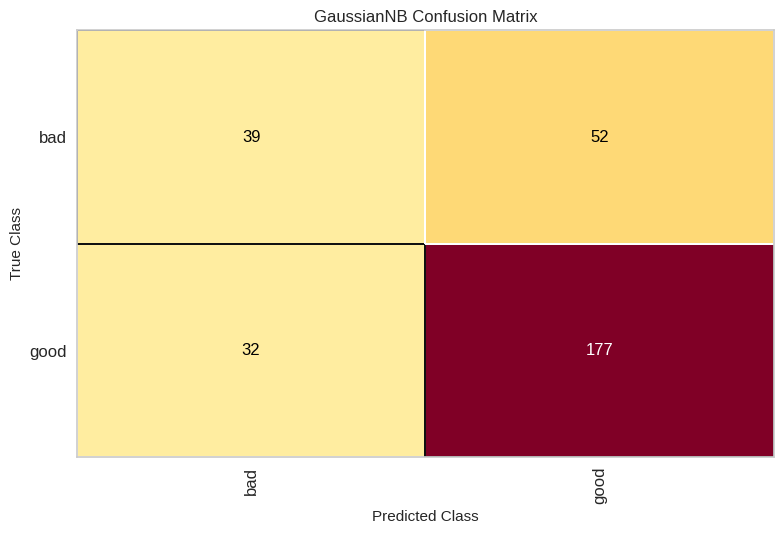

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [184]:
# Visualizando a matrix de confussão
# YellowBricks
v = ConfusionMatrix(GaussianNB())
v.fit(X_train, y_train)
v.score(X_teste, y_test) #Acurracia da matrix de confussão
v.poof()

In [185]:
novo_credito = pd.read_csv("NovoCredit.csv")
novo_credito

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes


In [186]:
novo_credito = novo_credito.iloc[:,0:20].values
novo_credito

array([["'no checking'", 12, "'existing paid'", 'radio/tv', 804, '<100',
        '>=7', 4, "'male single'", 'none', 4, 'car', 38, 'none', 'own',
        1, 'skilled', 1, 'none', 'yes']], dtype=object)

In [187]:
novo_credito[:,0] = labelencoder1.transform(novo_credito[:,0])

novo_credito[:,2] = labelencoder2.transform(novo_credito[:,2])

novo_credito[:,3] = labelencoder3.transform(novo_credito[:,3])

novo_credito[:,5] = labelencoder4.transform(novo_credito[:,5])

novo_credito[:,6] = labelencoder5.transform(novo_credito[:,6])

novo_credito[:,8] = labelencoder6.transform(novo_credito[:,8])

novo_credito[:,9] = labelencoder7.transform(novo_credito[:,9])

novo_credito[:,11] = labelencoder8.transform(novo_credito[:,11])

novo_credito[:,13] = labelencoder9.transform(novo_credito[:,13])

novo_credito[:,14] = labelencoder10.transform(novo_credito[:,14])

novo_credito[:,16] = labelencoder11.transform(novo_credito[:,16])

novo_credito[:,18] = labelencoder12.transform(novo_credito[:,18])

novo_credito[:,19] = labelencoder13.transform(novo_credito[:,19])

In [188]:
naive_bayes_model.predict(novo_credito)

array(['good'], dtype='<U4')